# 01. 선형회귀모델
## 1-1 단일 선형회귀


In [7]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

Epoch[100/1000], Loss  5.0497
Epoch[200/1000], Loss  5.0320
Epoch[300/1000], Loss  5.0161
Epoch[400/1000], Loss  5.0018
Epoch[500/1000], Loss  4.9888
Epoch[600/1000], Loss  4.9771
Epoch[700/1000], Loss  4.9664
Epoch[800/1000], Loss  4.9568
Epoch[900/1000], Loss  4.9480
Epoch[1000/1000], Loss  4.9401


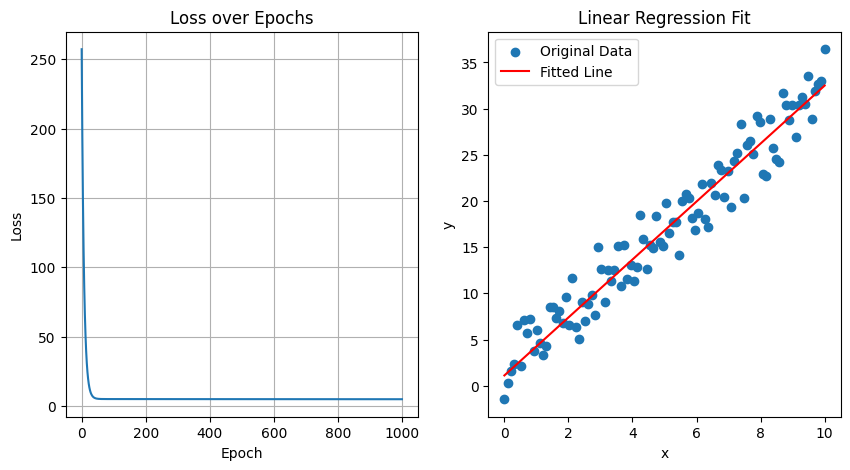

Model Parameters:
linear.weight: tensor([[3.1380]])
linear.bias: tensor([1.1103])


In [6]:
# 1. 데이터 생성
x = torch.linspace(0, 10, 100).view(-1, 1) # 입력 데이터
y = 3 * x + 2 + torch.randn(100, 1) * 2

# 2. 모델 정의
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)  # 입력 1개, 출력 1개

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()

# 3. 손실 함수, 옵티마이저 정의
criterion = nn.MSELoss() # 평균 제곱 오차
optimizer = optim.SGD(model.parameters(), lr=0.001) # 확률적 경사 하강법

# 4. 가중치 업데이트
epochs = 1000 # 학습 반복 횟수
losses = []

for epoch in range(epochs):
    optimizer.zero_grad() # 기울기 초기화
    outputs = model(x) # 예측값
    loss = criterion(outputs, y) # 손실 계산
    loss.backward() # 역전파
    optimizer.step() # 가중치 업데이트

    losses.append(loss.item())

    # 100번에 한번씩 로그 출력
    if (epoch + 1) % 100 == 0:
        print(f"Epoch[{epoch + 1}/{epochs}], Loss {loss.item(): .4f}")

# 5. 결과 시각화
plt.figure(figsize=(10,5))

# 손실 감소 그래프
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()

# 데이터와 예측 결과
plt.subplot(1, 2, 2)
plt.scatter(x.numpy(), y.numpy(), label="Original Data")
plt.plot(x.numpy(), model(x).detach().numpy(), color="r", label="Fitted Line")
plt.title("Linear Regression Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

print("Model Parameters:")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")

### 훈련 데이터, 평가데이터 분리

Epoch[100/1000], Loss  3.8260
Epoch[200/1000], Loss  3.8145
Epoch[300/1000], Loss  3.8044
Epoch[400/1000], Loss  3.7952
Epoch[500/1000], Loss  3.7868
Epoch[600/1000], Loss  3.7793
Epoch[700/1000], Loss  3.7724
Epoch[800/1000], Loss  3.7661
Epoch[900/1000], Loss  3.7605
Epoch[1000/1000], Loss  3.7553
최종 Test Loss:  3.0499


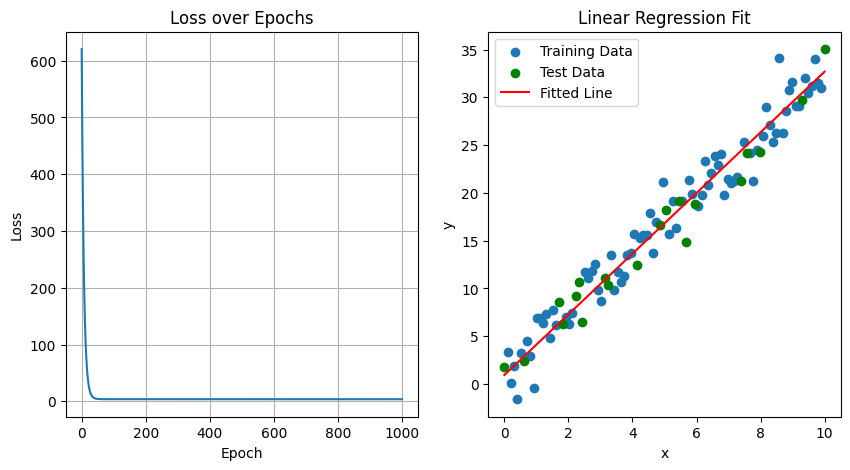

In [11]:
# 1. 데이터 생성
x = torch.linspace(0, 10, 100).view(-1, 1) # 입력 데이터
y = 3 * x + 2 + torch.randn(100, 1) * 2

# train / Test Set 분리 (8:2로 분리)
num_train = int(len(x) * 0.8)
indices = torch.randperm(len(x))
train_idx, test_idx = indices[:num_train], indices[num_train:]

x_train, y_train = x[train_idx], y[train_idx]
x_test, y_test = x[test_idx], y[test_idx]


# 2. 모델 정의
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)  # 입력 1개, 출력 1개

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()

# 3. 손실 함수, 옵티마이저 정의
criterion = nn.MSELoss() # 평균 제곱 오차
optimizer = optim.SGD(model.parameters(), lr=0.001) # 확률적 경사 하강법

# 4. 가중치 업데이트
epochs = 1000 # 학습 반복 횟수
losses = []

for epoch in range(epochs):
    optimizer.zero_grad() # 기울기 초기화
    outputs = model(x_train) # 예측값
    loss = criterion(outputs, y_train) # 손실 계산
    loss.backward() # 역전파
    optimizer.step() # 가중치 업데이트

    losses.append(loss.item())

    # 100번에 한번씩 로그 출력
    if (epoch + 1) % 100 == 0:
        print(f"Epoch[{epoch + 1}/{epochs}], Loss {loss.item(): .4f}")

# 5. 테스트 데이터 평가
with torch.no_grad():
    test_output = model(x_test)
    test_loss = criterion(test_output, y_test)
print(f"최종 Test Loss: {test_loss.item(): .4f}")

# 5. 결과 시각화
plt.figure(figsize=(10,5))

# 손실 감소 그래프
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()

# 데이터와 예측 결과
plt.subplot(1, 2, 2)
plt.scatter(x_train.numpy(), y_train.numpy(), label="Training Data")
plt.scatter(x_test.numpy(), y_test.numpy(), label="Test Data", color="g")
plt.plot(x.numpy(), model(x).detach().numpy(), color="r", label="Fitted Line")
plt.title("Linear Regression Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# print("Model Parameters:")
# for name, param in model.named_parameters():
#     print(f"{name}: {param.data}")

## 1-2. 다중선형회귀

Epoch[100/1000], Loss:  3.3803
Epoch[200/1000], Loss:  3.1628
Epoch[300/1000], Loss:  3.0010
Epoch[400/1000], Loss:  2.8725
Epoch[500/1000], Loss:  2.7704
Epoch[600/1000], Loss:  2.6892
Epoch[700/1000], Loss:  2.6245
Epoch[800/1000], Loss:  2.5728
Epoch[900/1000], Loss:  2.5314
Epoch[1000/1000], Loss:  2.4983

Model Parameters:
linear.weight: tensor([[0.2031, 0.4208, 0.0150]])
linear.bias: tensor([-0.2614])


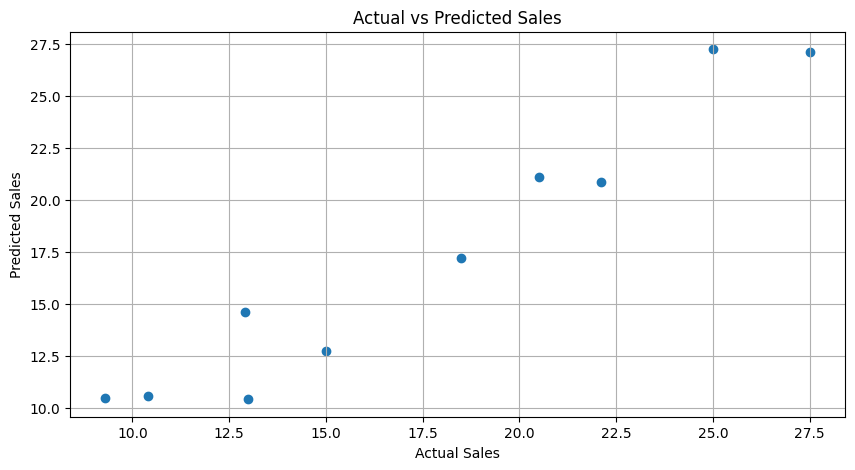

In [17]:
# 1. 데이터 입출력 정의
x = torch.tensor([[50.0, 25.0, 30.0],
                  [10.0, 20.0, 25.0],
                  [5.0, 22.0, 30.0],
                  [30.0, 26.0, 28.0],
                  [40.0, 15.0, 28.0],
                  [60.0, 35.0, 40.0],
                  [70.0, 30.0, 35.0],
                  [20.0, 15.0, 20.0],
                  [25.0, 18.0, 22.0],
                  [45.0, 28.0, 30.0]], dtype=torch.float32)

y = torch.tensor([[22.1], [10.4], [9.3], [18.5], [12.9], 
                  [25.0], [27.5], [13.0], [15.0], [20.5]], dtype=torch.float32)

class MultipleLinearRegression(nn.Module):
    def __init__(self):
        super(MultipleLinearRegression, self).__init__()
        self.linear = nn.Linear(3,1)

    def forward(self, x):
        return self.linear(x)

model = MultipleLinearRegression()

criterion = nn.MSELoss()

optimizer = optim.SGD(model.parameters(), lr=0.0001)
epochs = 1000
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(x)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch[{epoch+1}/{epochs}], Loss: {loss.item(): .4f}")

print("\nModel Parameters:")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")

with torch.no_grad():
    predicted = model(x)

plt.figure(figsize=(10,5))
plt.scatter(y.numpy(), predicted.numpy())
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid()
plt.show()
